# Report

The goal of this homework was to get familiar with Local Interpretable Model-agnostic Explanations (LIME). 

In this notebook I used 2 randomly selected test samples on heart attack dataset.

Firstly I trained random forrest and explained it with lime implemented in dalex library. The results are presented on the plot below.

![Lime for random forrest p28 v1](https://github.com/edsuch21/eXplainableMachineLearning-2023/blob/main/Homeworks/HW3/EdwardSucharda/lim_rf_p28_1.png?raw=true)

![Lime for random forrest p28 v2](https://github.com/edsuch21/eXplainableMachineLearning-2023/blob/main/Homeworks/HW3/EdwardSucharda/lim_rf_p28_2.png?raw=true)

![Lime for random forrest p38 v1](https://github.com/edsuch21/eXplainableMachineLearning-2023/blob/main/Homeworks/HW3/EdwardSucharda/lim_rf_p38_1.png?raw=true)

![Lime for random forrest p38 v2](https://github.com/edsuch21/eXplainableMachineLearning-2023/blob/main/Homeworks/HW3/EdwardSucharda/lim_rf_p38_2.png?raw=true)

Lime method is not a stable method. The score of single observations depends on the sampling "in the neighbourhood" of the examined sample. In my case the result for iteration (version) looks pretty much the same but they are not the same. For both patient 28 and 28 the last two features from top 10 are switching places in different versions. But despite this small changes result do not change much because there are enought samples to well define the space around observation.

Comparing obtained values across different observations one can see that there are simillar values for every modified variable (changed to binary values). This is because LIME takes every feature independently and calculates values for subspaces.

Comparing this method and Shapley Values method simmilar is fact that both methods give positive or negative values for some feature (or group of features). The main difference between those two methods is that shapley is caluclates influence a change of only one examined feature on the output. The LIME method analizes the samples around the examined one and thus behaves more like derivative. Shapley value is the difference of expected value of the output calculated with versus without one feature (of one observation).

I trained also SVM model and Logistic Regression. The LIME values are presented below.

![Lime for svm p28](https://github.com/edsuch21/eXplainableMachineLearning-2023/blob/main/Homeworks/HW3/EdwardSucharda/lim_svm_p28_1.png?raw=true)

![Lime for svm p38](https://github.com/edsuch21/eXplainableMachineLearning-2023/blob/main/Homeworks/HW3/EdwardSucharda/lim_svm_p38_1.png?raw=true)

![Lime for logistic regression p28](https://github.com/edsuch21/eXplainableMachineLearning-2023/blob/main/Homeworks/HW3/EdwardSucharda/lim_lr_p28_1.png?raw=true)

![Lime for logistic regression p38](https://github.com/edsuch21/eXplainableMachineLearning-2023/blob/main/Homeworks/HW3/EdwardSucharda/lim_lr_p38_1.png?raw=true)

The results of lime values across different methods are different. This is because models tries to fit to data in different ways so they give different outputs for the same observations. Despite the results are different across different methods, the features have similar values across different observations (as it was in random forrest). Models somtimes classify similarly and this can be seen that for all models, samples and versions the feature `thall <=-0.51` has very high positive impact on the output.

# Appendix

In [1]:
pip install dalex lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LogisticRegression, LinearRegression
import dalex as dx
import lime
import random

In [3]:
hearts_df = pd.read_csv("heart.csv")

In [4]:
hearts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
for i in range(4):
  hearts_df[f"cp{i}"] = (hearts_df["cp"] == i) * 1
for i in range(3):
  hearts_df[f"restecg{i}"] = (hearts_df["restecg"] == i) * 1

In [6]:
y_heart = hearts_df["output"]
x_heart = hearts_df.drop(columns=["cp", "restecg", "output"])

In [7]:
x_heart.describe()

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,slp,caa,thall,cp0,cp1,cp2,cp3,restecg0,restecg1,restecg2
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,131.623762,246.264026,0.148515,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.471947,0.165017,0.287129,0.075908,0.485149,0.501650,0.013201
std,9.082101,0.466011,17.538143,51.830751,0.356198,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.500038,0.371809,0.453171,0.265288,0.500606,0.500824,0.114325
min,29.000000,0.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,130.000000,240.000000,0.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,140.000000,274.500000,0.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
for column in x_heart.columns:
  x_heart[column] = (x_heart[column] - x_heart[column].mean()) / x_heart[column].std()

In [9]:
X_train_heart, X_test_heart, y_train_heart, y_test_heart = train_test_split(x_heart, y_heart, test_size=0.33, random_state=446519)

In [10]:
rf_h = RandomForestClassifier(n_estimators = 300, max_depth=5, random_state=446519)
rf_h.fit(X_train_heart, y_train_heart)

RandomForestClassifier(max_depth=5, n_estimators=300, random_state=446519)

In [11]:
random.seed(446519)

idx1 = random.randint(0, X_test_heart.shape[0] - 1)
idx2 = random.randint(0, X_test_heart.shape[0] - 1)
indices = [idx1, idx2]

In [12]:
sample1 = X_test_heart.iloc[[idx1]]
sample2 = X_test_heart.iloc[[idx2]]

In [13]:
print(f"Probailty of heart attack in first sample equals: {rf_h.predict_proba(sample1)[0][1]*100}%")
print(f"Probailty of heart attack in second sample equals: {rf_h.predict_proba(sample2)[0][1]*100}%")

Probailty of heart attack in first sample equals: 55.38228180752807%
Probailty of heart attack in second sample equals: 23.03908323870259%


In [14]:
model_predicting_method = lambda m, d: m.predict_proba(d)[:, 1]

explainer_dx_rf_a = dx.Explainer(rf_h, X_test_heart, y_test_heart, predict_function=model_predicting_method, label="RF_heart_attack")

Preparation of a new explainer is initiated

  -> data              : 100 rows 18 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 100 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : RF_heart_attack
  -> predict function  : <function <lambda> at 0x7f77a2a965f0> will be used
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0096, mean = 0.517, max = 0.972
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.866, mean = 0.0334, max = 0.948
  -> model_info        : package sklearn

A new explainer has been created!


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [15]:
explainer_dx_rf_a.model_performance()

,recall,precision,f1,accuracy,auc
RF_heart_attack,0.854545,0.854545,0.854545,0.84,0.896566


In [16]:
X_test_heart.median(axis=0)

age         0.289984
sex         0.679881
trtbps     -0.092585
chol       -0.043681
fbs        -0.416945
thalachh    0.102734
exng       -0.695480
oldpeak    -0.120237
slp        -0.648041
caa        -0.713249
thall      -0.512075
cp0        -0.943822
cp1        -0.443820
cp2        -0.633600
cp3        -0.286132
restecg0   -0.969122
restecg1    0.995059
restecg2   -0.115472
dtype: float64

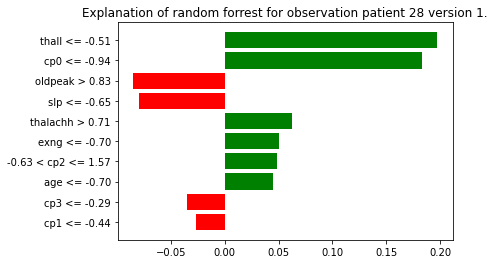

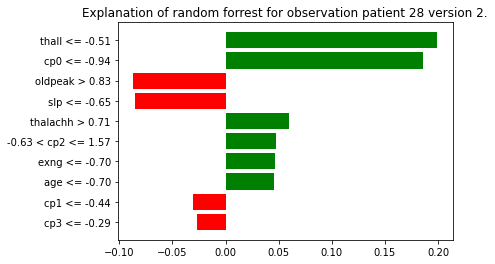

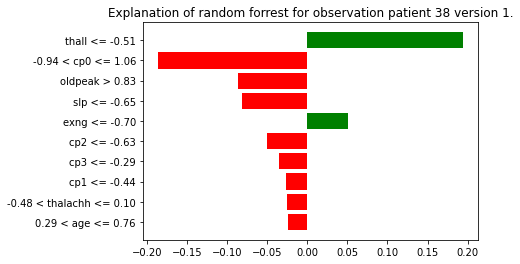

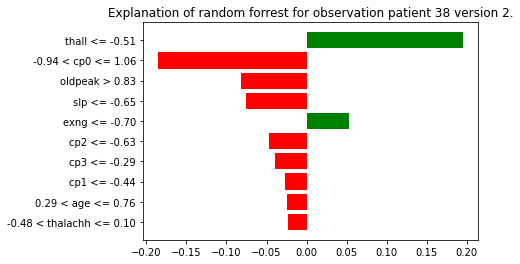

In [17]:
import numpy as np
import matplotlib.pyplot as plt

for i in range(0, 4):
  random.seed(i)
  np.random.seed(i)
  lime_attributions_dx_rf = explainer_dx_rf_a.predict_surrogate(X_test_heart.iloc[[indices[i//2]]], label=f'patient {[indices[i//2]]} rf')
  lime_attributions_dx_rf.plot(return_figure=True)
  plt.title(f'Explanation of random forrest for observation patient {indices[i // 2]} version {i%2 + 1}.')

In [18]:
svc = SVC(random_state=446519, probability=True)
svc.fit(X_train_heart, y_train_heart)

SVC(probability=True, random_state=446519)

In [19]:
explainer_dx_svm = dx.Explainer(svc, X_test_heart, y_test_heart, predict_function=model_predicting_method, label="SVM_heart_attack")

Preparation of a new explainer is initiated

  -> data              : 100 rows 18 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 100 values
  -> model_class       : sklearn.svm._classes.SVC (default)
  -> label             : SVM_heart_attack
  -> predict function  : <function <lambda> at 0x7f77a2a965f0> will be used
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.00806, mean = 0.515, max = 0.97
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.898, mean = 0.035, max = 0.984
  -> model_info        : package sklearn

A new explainer has been created!


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


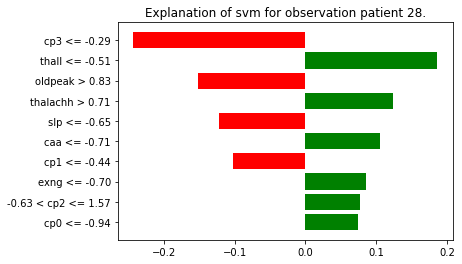

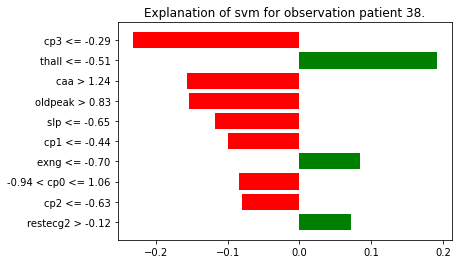

In [20]:
for i in range(0, 2):
  random.seed(i)
  np.random.seed(i)
  lime_attributions_dx_svm = explainer_dx_svm.predict_surrogate(X_test_heart.iloc[[indices[i]]], label=f'patient {[indices[i]]} svm')
  lime_attributions_dx_svm.plot(return_figure=True)
  plt.title(f'Explanation of svm for observation patient {indices[i]}.')

In [21]:
lr = LogisticRegression()
lr.fit(X_train_heart, y_train_heart)

LogisticRegression()

In [22]:
explainer_dx_lr = dx.Explainer(lr, X_test_heart, y_test_heart, predict_function=model_predicting_method, label="SVM_heart_attack")

Preparation of a new explainer is initiated

  -> data              : 100 rows 18 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 100 values
  -> model_class       : sklearn.linear_model._logistic.LogisticRegression (default)
  -> label             : SVM_heart_attack
  -> predict function  : <function <lambda> at 0x7f77a2a965f0> will be used
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.000599, mean = 0.522, max = 0.997
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.954, mean = 0.028, max = 0.973
  -> model_info        : package sklearn

A new explainer has been created!


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


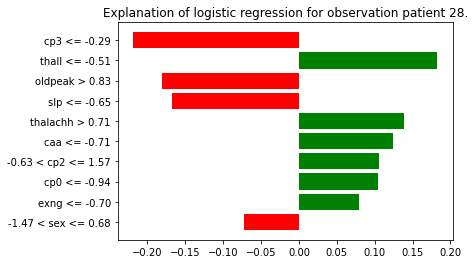

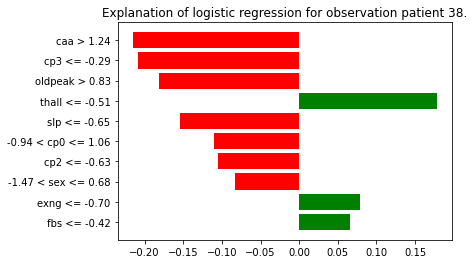

In [23]:
for i in range(0, 2):
  random.seed(i)
  np.random.seed(i)
  lime_attributions_dx_lr = explainer_dx_lr.predict_surrogate(X_test_heart.iloc[[indices[i]]], label=f'patient {[indices[i]]} lr')
  lime_attributions_dx_lr.plot(return_figure=True)
  plt.title(f'Explanation of logistic regression for observation patient {indices[i]}.')